In [59]:
import pandas as pd
import numpy as nm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [60]:
df = pd.read_csv("https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Iris.csv",index_col = 0)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [61]:
#basic eda
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: ylabel='Id'>

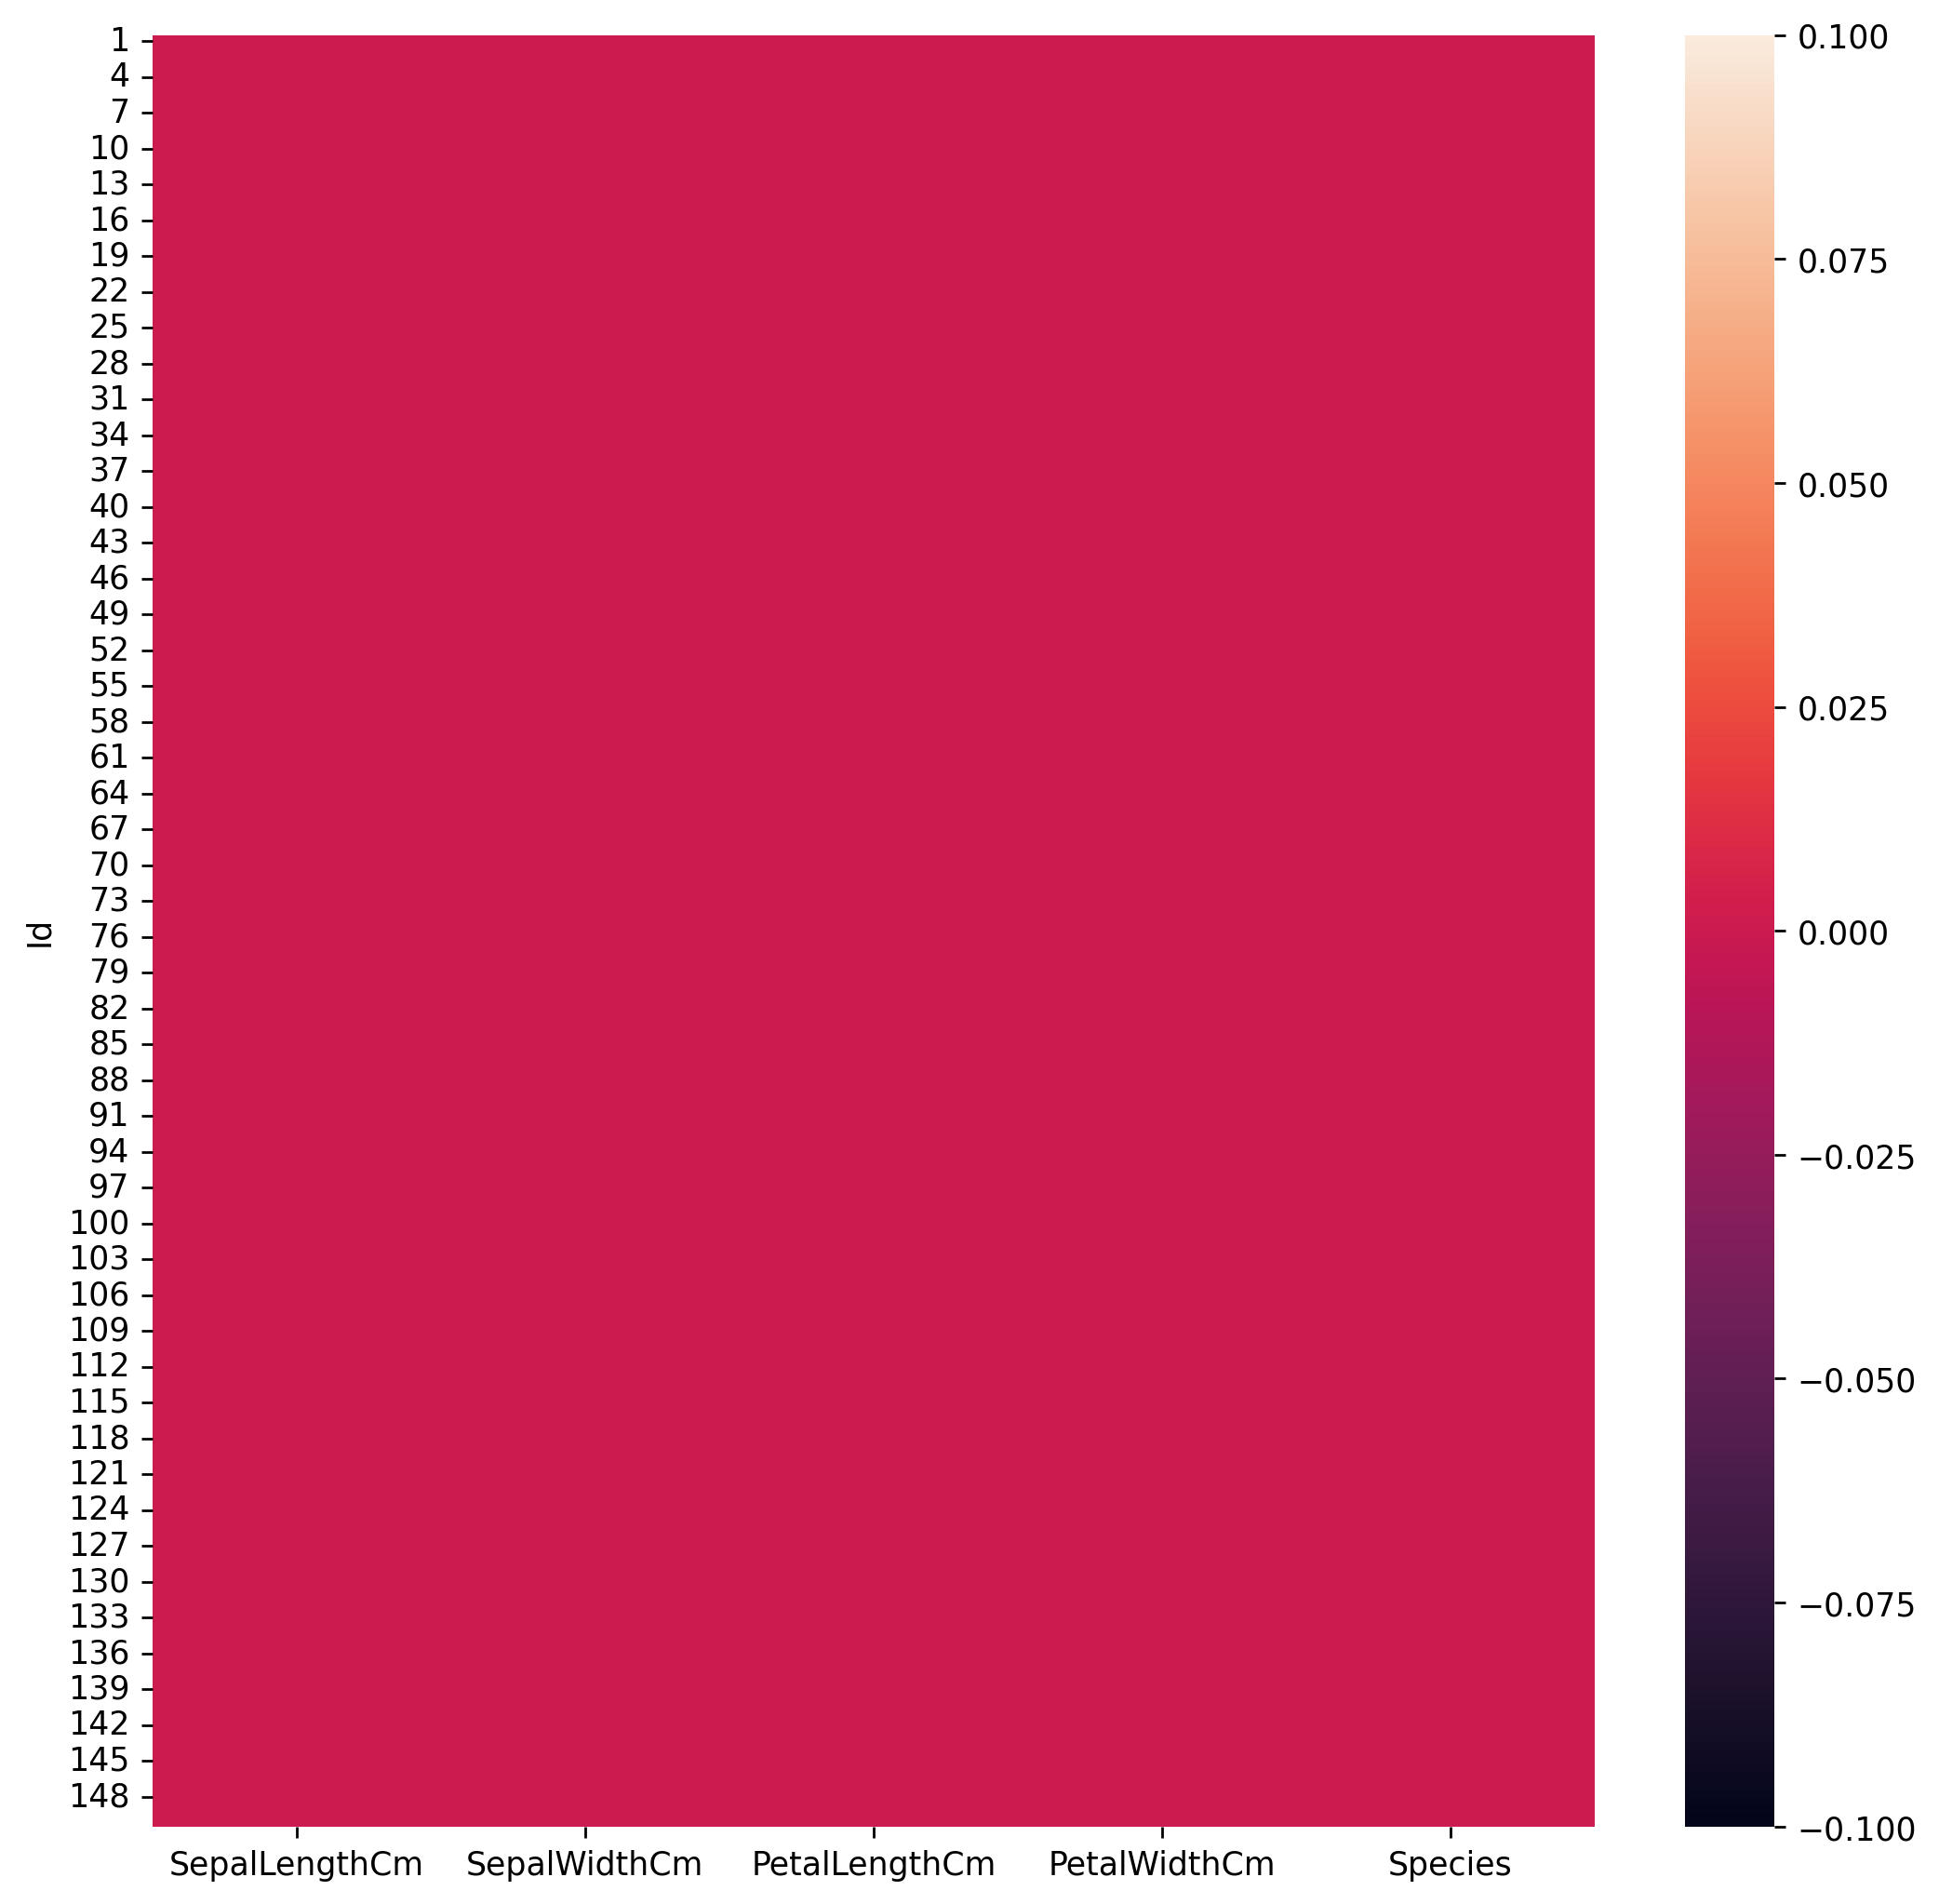

In [62]:
sns.heatmap(df.isna())

<Axes: >

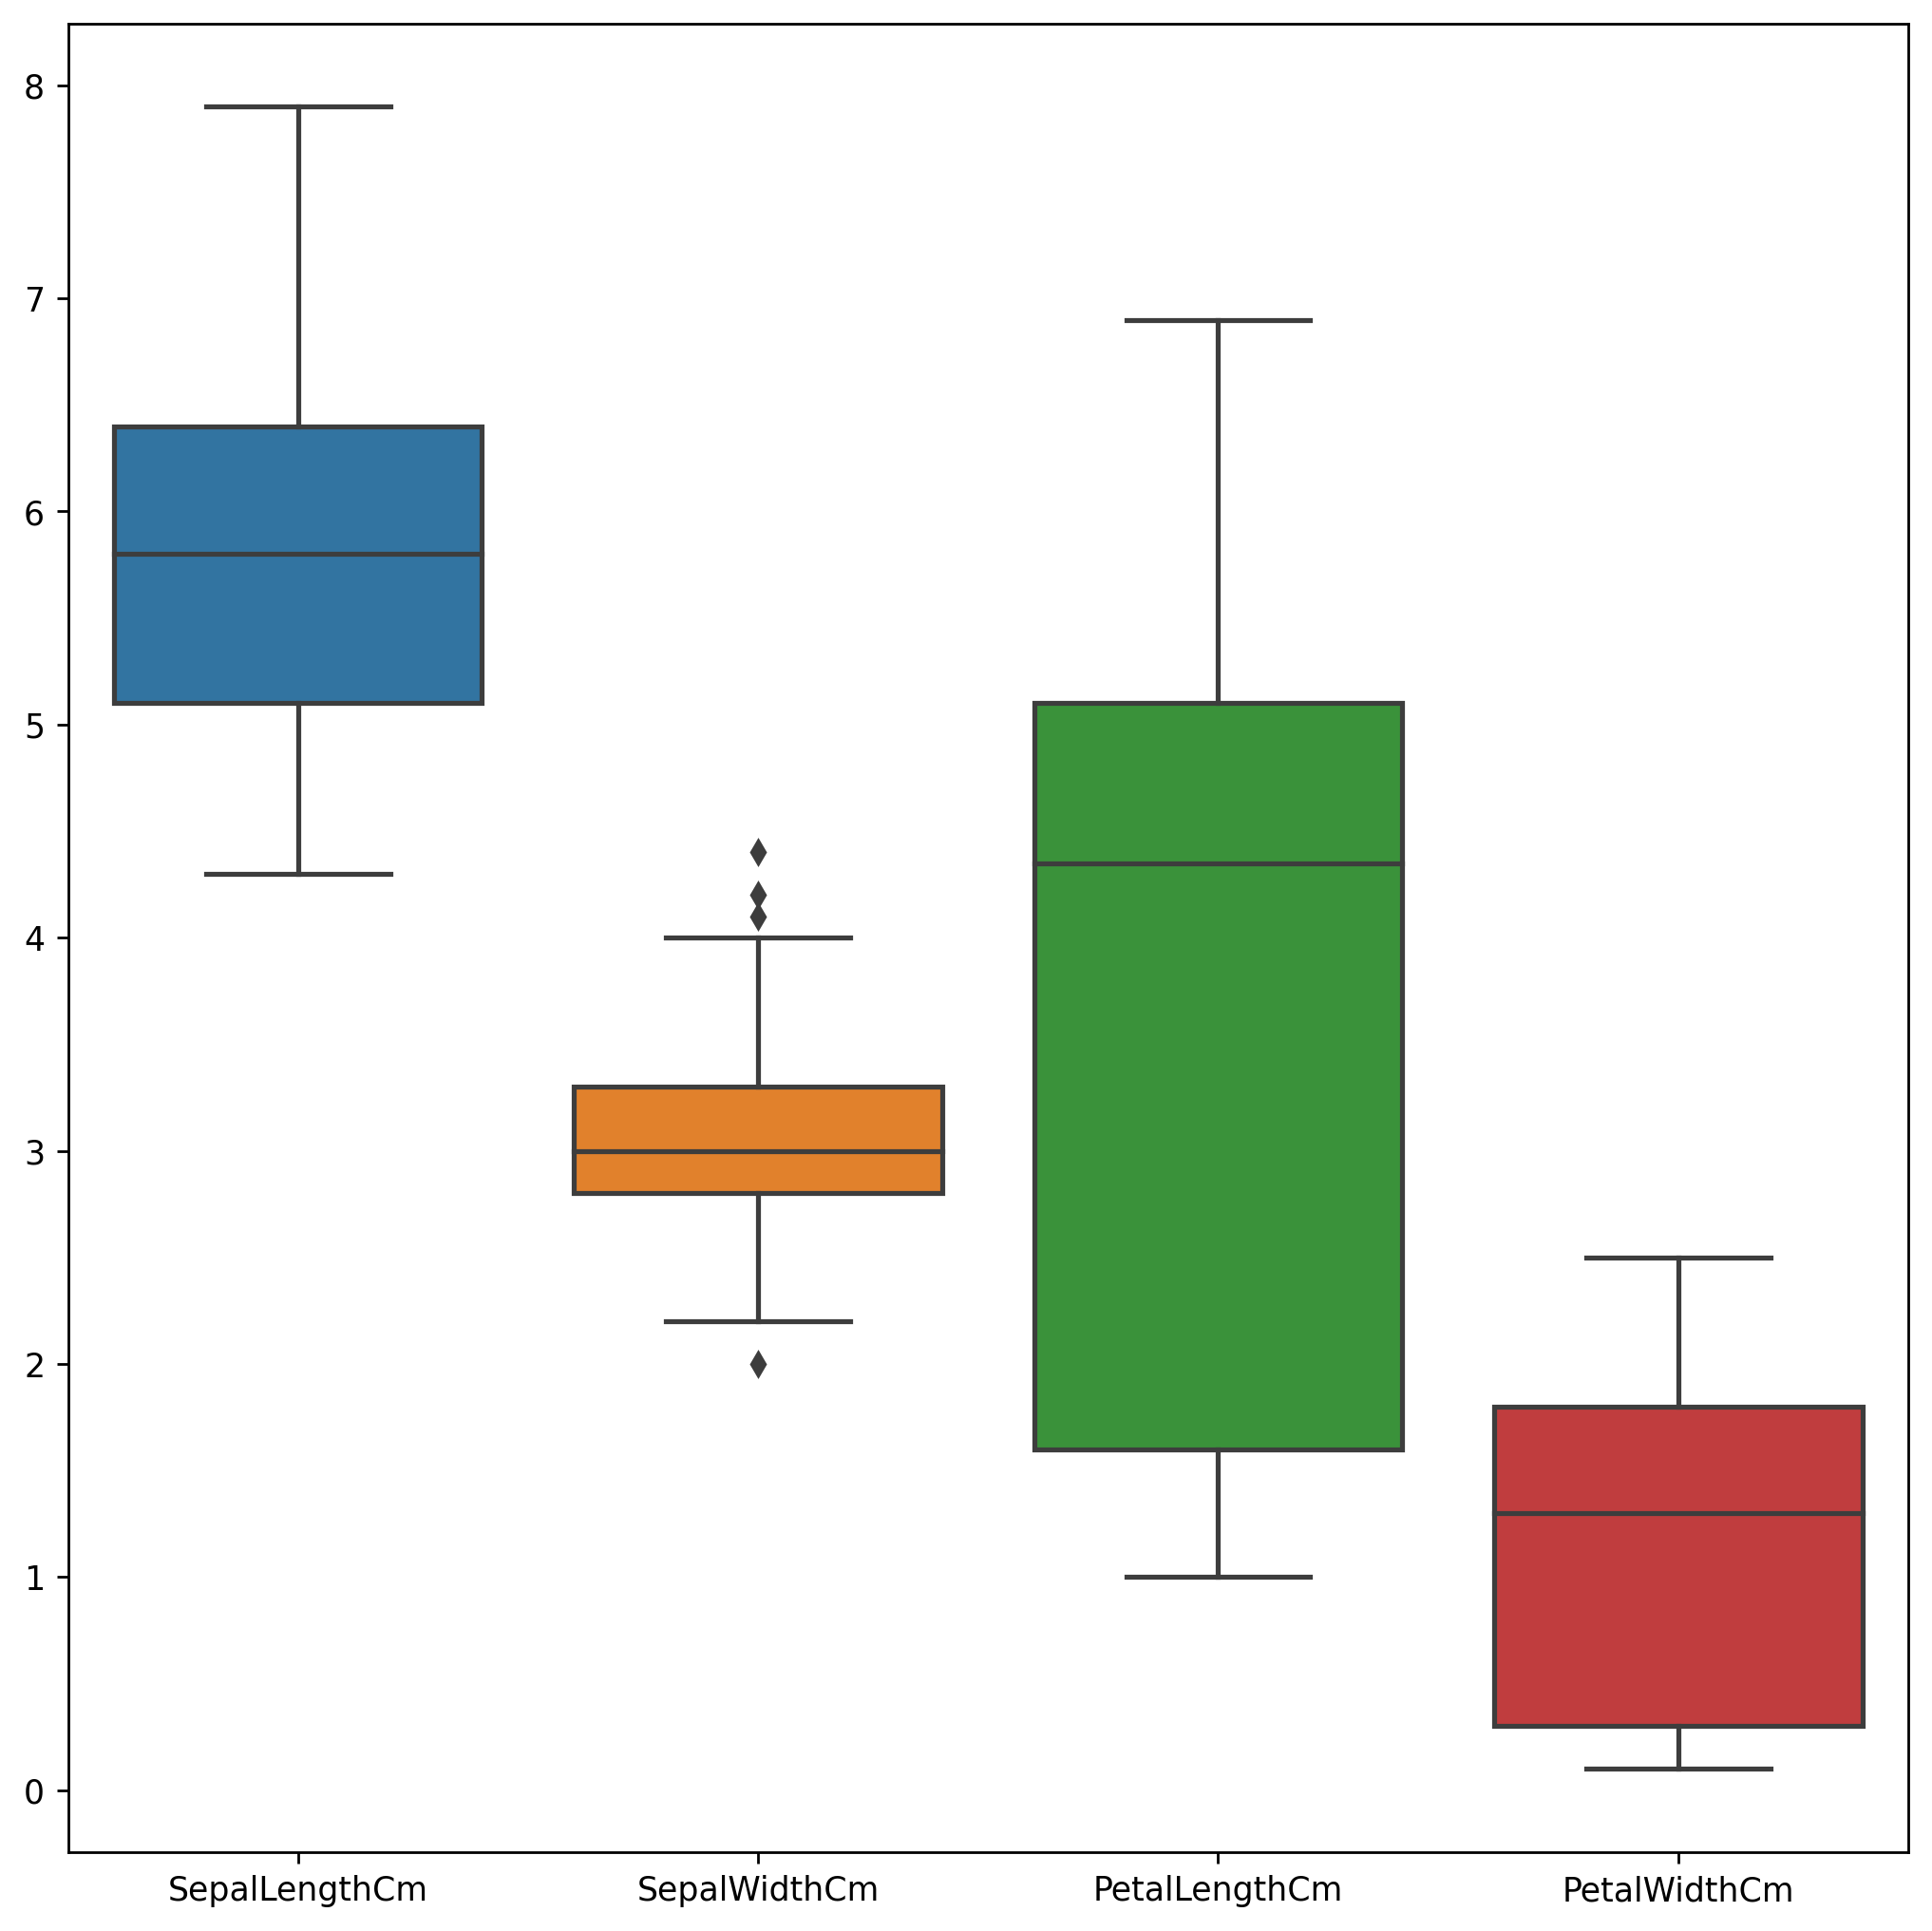

In [63]:
sns.boxplot(df)

<Axes: xlabel='SepalWidthCm'>

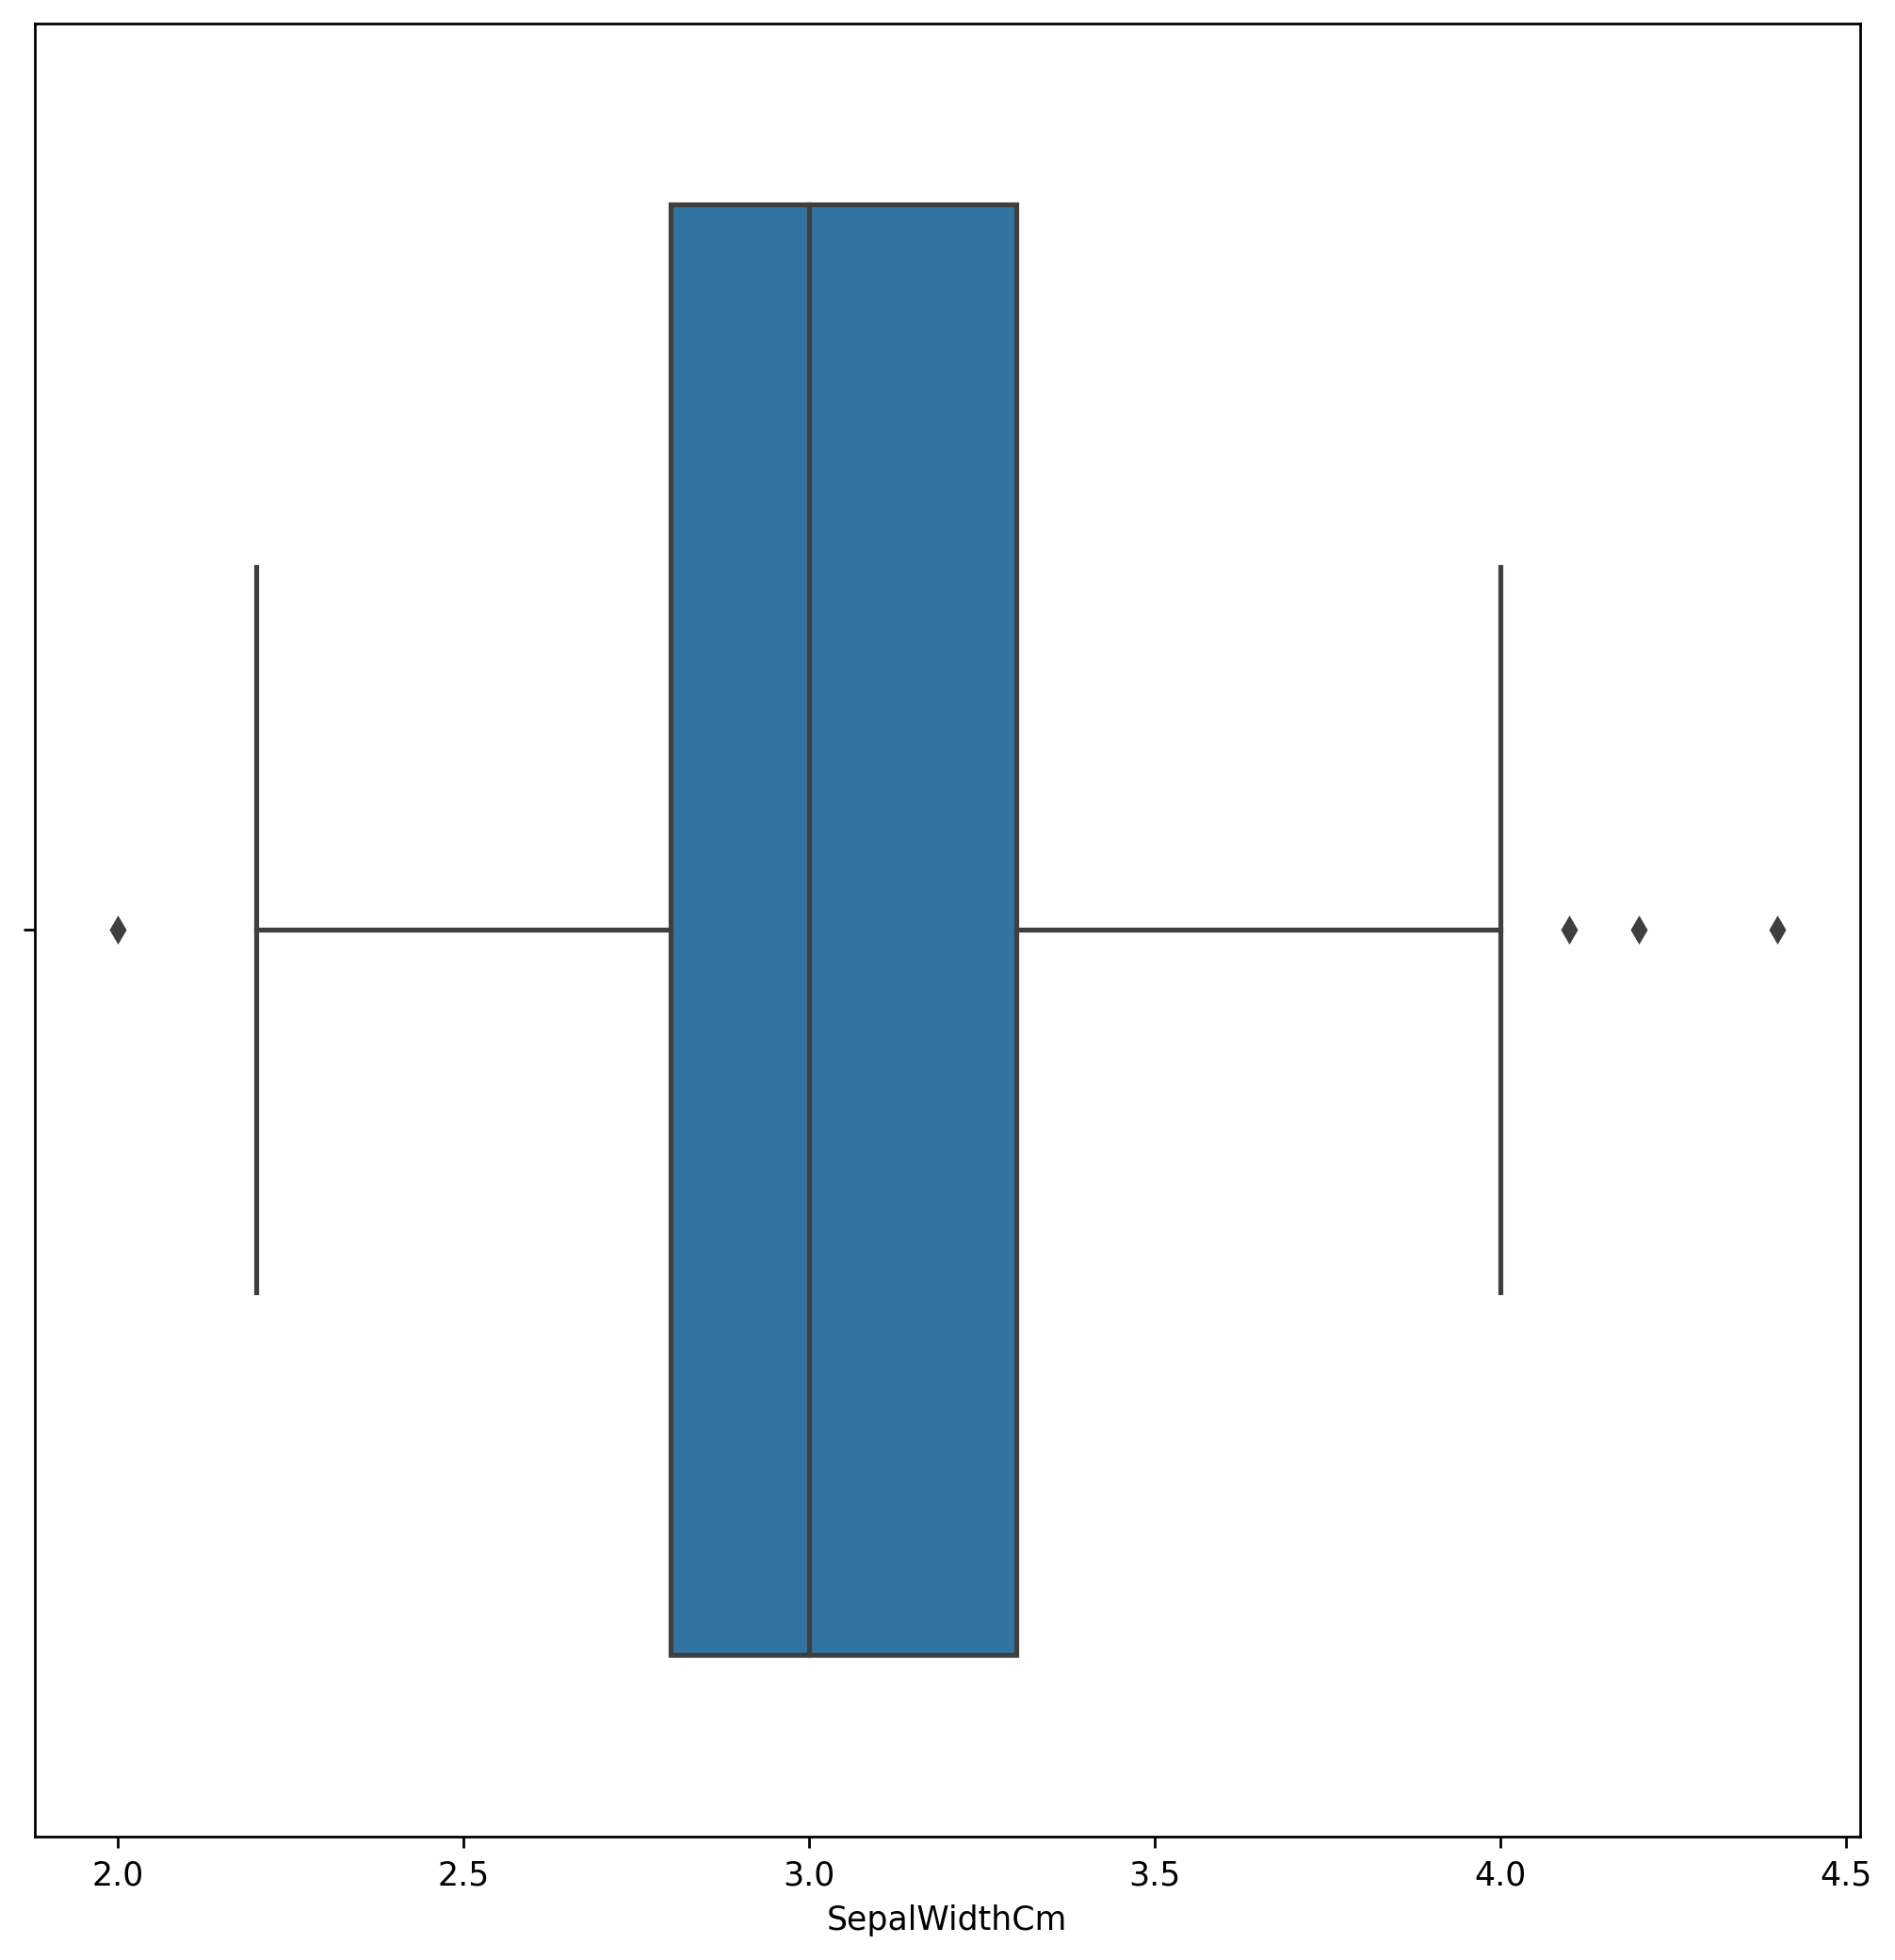

In [64]:
sns.boxplot(x = df['SepalWidthCm'])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [66]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [67]:
y

Id
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
            ...      
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
150    Iris-virginica
Name: Species, Length: 150, dtype: object

In [68]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [69]:
#lebal encoding
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [70]:
#splitting the data
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.20,random_state = 42)

In [71]:
#model building
dt = DecisionTreeClassifier(criterion = "entropy")
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
ypred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [72]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [74]:
print(f"training Accuracy : {dt.score(xtrain,ytrain)} \nTesting Accuracy : {dt.score(xtest,ytest)}")

training Accuracy : 1.0 
Testing Accuracy : 1.0


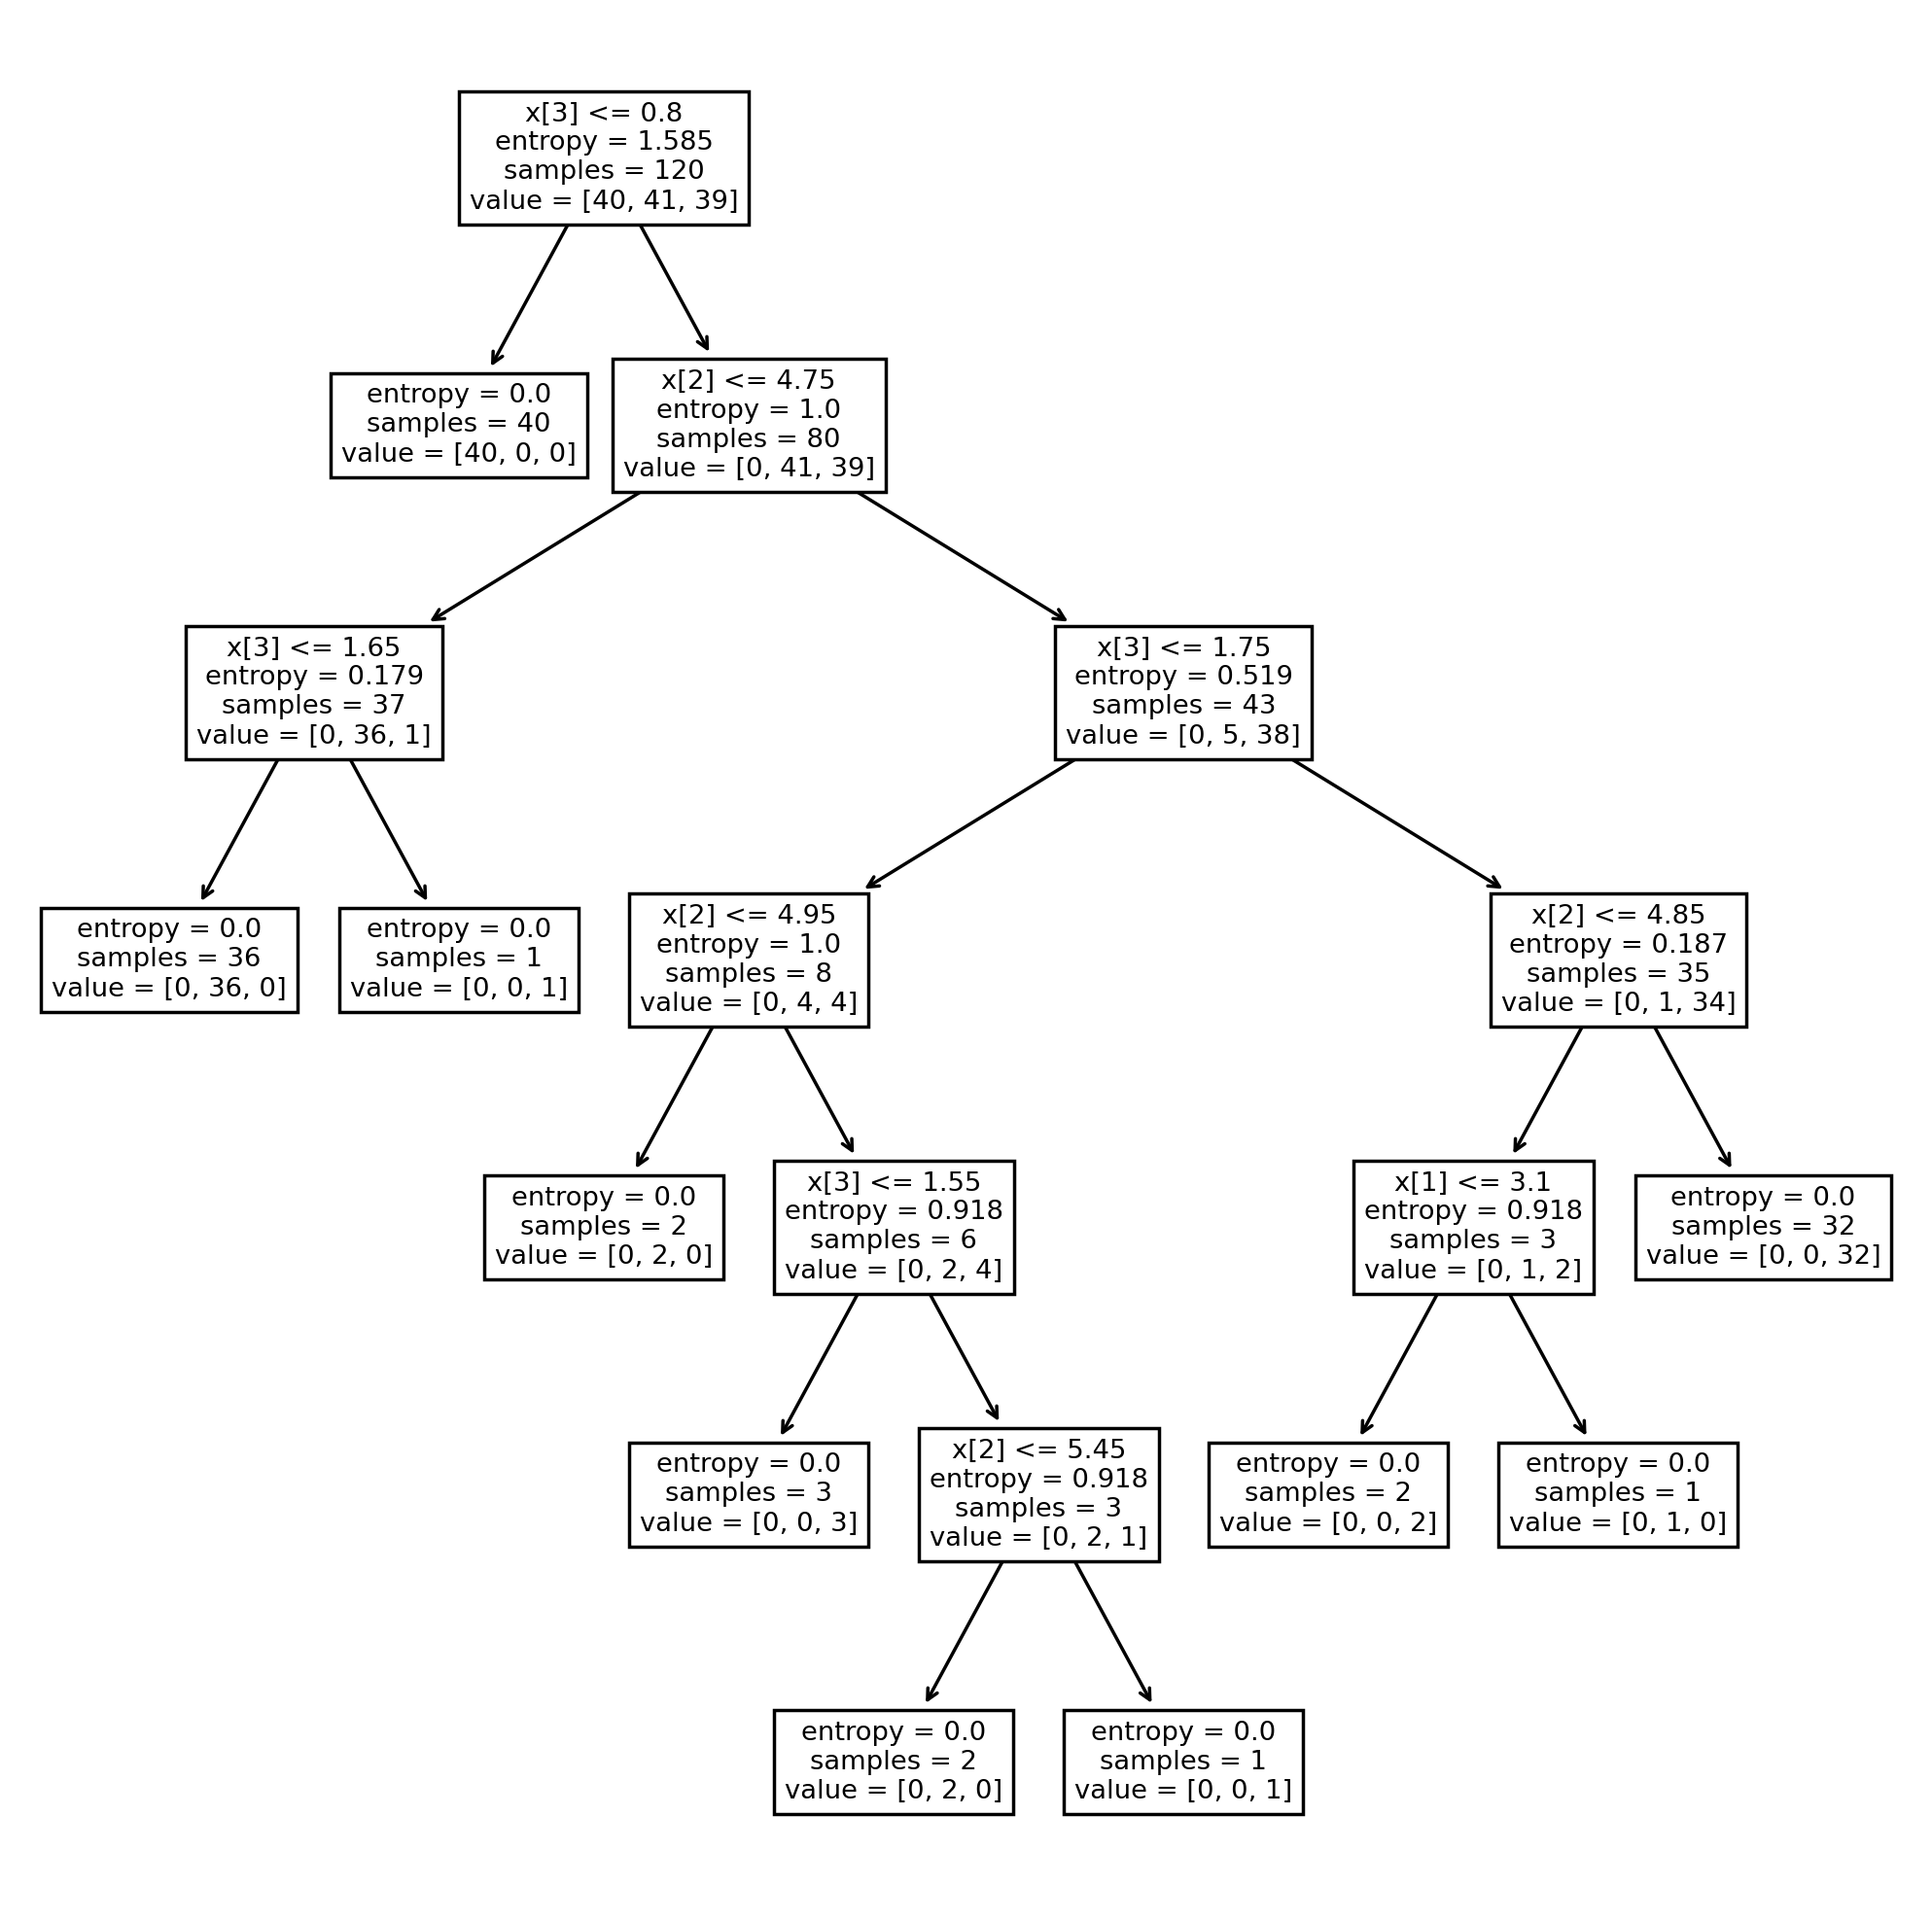

In [75]:
tree.plot_tree(dt)
plt.show()

In [76]:
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 250


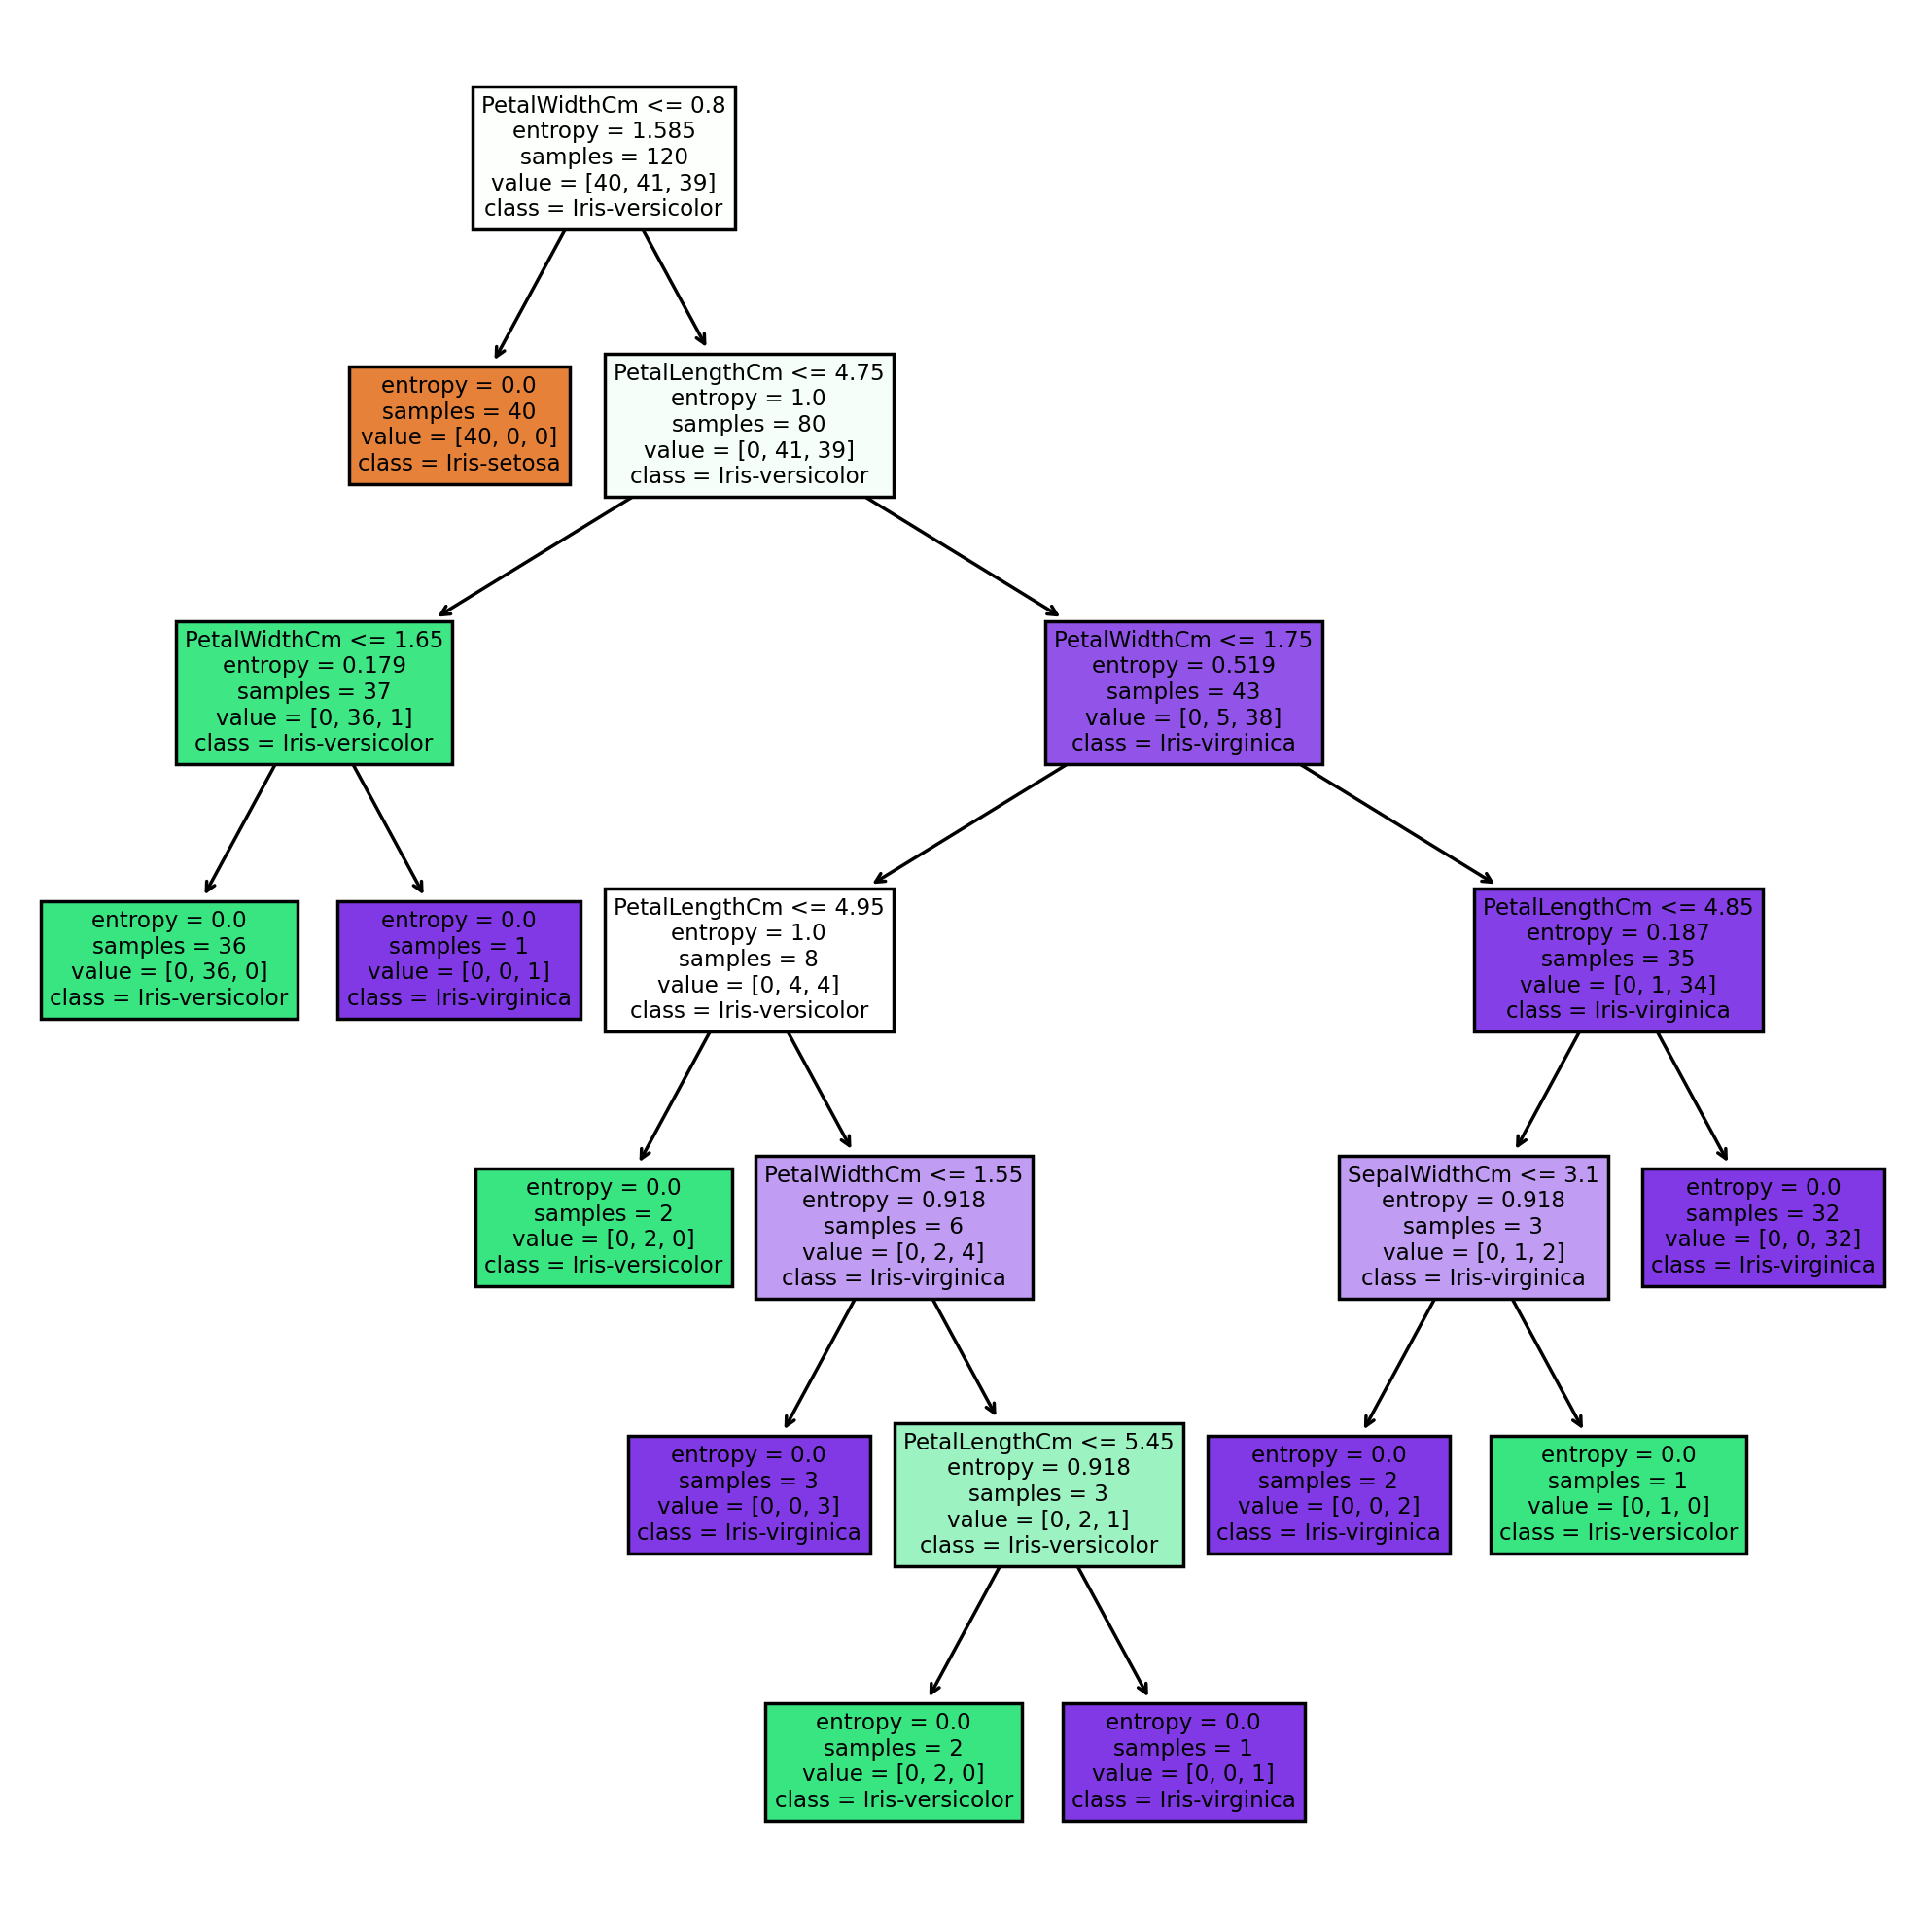

In [77]:
tree.plot_tree(dt, feature_names=x.columns,
               class_names=df['Species'].unique(),
              filled=True)
plt.show()


In [78]:
dt.feature_importances_ #PetalLengthCm is most imp columns

array([0.        , 0.01448725, 0.3159157 , 0.66959704])

In [79]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


# **Decision Tree Regressor**

In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [81]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [82]:
x = df.iloc[:,:3]
y = df.iloc[:,3]

In [83]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm
Id,,,
1,5.1,3.5,1.4
2,4.9,3.0,1.4
3,4.7,3.2,1.3
4,4.6,3.1,1.5
5,5.0,3.6,1.4
...,...,...,...
146,6.7,3.0,5.2
147,6.3,2.5,5.0
148,6.5,3.0,5.2


In [84]:
y

Id
1      0.2
2      0.2
3      0.2
4      0.2
5      0.2
      ... 
146    2.3
147    1.9
148    2.0
149    2.3
150    1.8
Name: PetalWidthCm, Length: 150, dtype: float64

In [85]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.20,random_state = 42)

In [91]:
dt = DecisionTreeRegressor()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
ypred

array([1.5, 0.4, 1.4, 1.5, 1.8, 0.2, 1. , 1.7, 1.7, 1.2, 1.7, 0.2, 0.2,
       0.1, 0.4, 1.4, 1.8, 1.3, 1.5, 1.8, 0.2, 1.5, 0.2, 1.8, 2.2, 2.1,
       1.4, 2.3, 0.2, 0.2])

In [93]:
print(r2_score(ytest,ypred))

0.8626090300477198


In [94]:
print(f"training Accuracy : {dt.score(xtrain,ytrain)}\ntesting accuracy : {dt.score(xtest,ytest)}")

training Accuracy : 0.9987417333733019
testing accuracy : 0.8626090300477198


In [95]:
#hypreparameter tunning
from sklearn.model_selection import GridSearchCV

In [96]:
params = {
    'criterion' : ["squared_error", "friedman_mse", "absolute_error"],
    'splitter' : ['best','random'],
    'max_depth' : [2,3,4,5,6,7,8,9]
    }

In [98]:
grid = GridSearchCV(DecisionTreeRegressor(),param_grid = params)

In [99]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']})

In [101]:
grid.best_params_

{'criterion': 'friedman_mse', 'max_depth': 5, 'splitter': 'random'}

In [102]:
dt = DecisionTreeRegressor(criterion='friedman_mse', max_depth=5, splitter='random')

In [103]:
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
ypred

array([1.54444444, 0.26666667, 1.76666667, 1.5       , 1.54444444,
       0.26666667, 1.2       , 1.78571429, 1.5       , 1.2       ,
       1.78571429, 0.2       , 0.26666667, 0.2       , 0.26666667,
       1.54444444, 1.99090909, 1.2       , 1.5       , 1.76666667,
       0.2       , 1.78571429, 0.26666667, 1.76666667, 2.23333333,
       2.15      , 1.76666667, 2.23333333, 0.2       , 0.2       ])

In [104]:
r2_score(ytest,ypred)

0.9320921847273731

In [105]:
print(f"training Accuracy : {dt.score(xtrain,ytrain)}\ntesting accuracy : {dt.score(xtest,ytest)}")

training Accuracy : 0.9552239823803368
testing accuracy : 0.9320921847273731
